In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing, feature_selection, metrics
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import lime
from lime import lime_text
stop = stopwords.words('english')
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

In [2]:
all_wines = pd.read_csv('Data/winemag-data-130k-v2.csv')
all_wines.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [3]:
clean_wines = all_wines.drop(columns=['Unnamed: 0', 'taster_twitter_handle', 'region_2', 'price', 'province',
                                     'region_1', 'taster_name', 'title', 'variety', 'winery', 'country', 'designation'])
clean_wines = clean_wines.dropna()
clean_wines

description  points
0       Aromas include tropical fruit, broom, brimston...      87
1       This is ripe and fruity, a wine that is smooth...      87
2       Tart and snappy, the flavors of lime flesh and...      87
3       Pineapple rind, lemon pith and orange blossom ...      87
4       Much like the regular bottling from 2012, this...      87
...                                                   ...     ...
129966  Notes of honeysuckle and cantaloupe sweeten th...      90
129967  Citation is given as much as a decade of bottl...      90
129968  Well-drained gravel soil gives this wine its c...      90
129969  A dry style of Pinot Gris, this is crisp with ...      90
129970  Big, rich and off-dry, this is powered by inte...      90

[129971 rows x 2 columns]

In [4]:
clean_wines = clean_wines.drop_duplicates('description')
clean_wines 

description  points
0       Aromas include tropical fruit, broom, brimston...      87
1       This is ripe and fruity, a wine that is smooth...      87
2       Tart and snappy, the flavors of lime flesh and...      87
3       Pineapple rind, lemon pith and orange blossom ...      87
4       Much like the regular bottling from 2012, this...      87
...                                                   ...     ...
129966  Notes of honeysuckle and cantaloupe sweeten th...      90
129967  Citation is given as much as a decade of bottl...      90
129968  Well-drained gravel soil gives this wine its c...      90
129969  A dry style of Pinot Gris, this is crisp with ...      90
129970  Big, rich and off-dry, this is powered by inte...      90

[119955 rows x 2 columns]

In [5]:
clean_wines['grade'] = clean_wines['points'].apply(lambda x: 'A' if x >= 91 else
                                                             'B' if x >= 88 else
                                                             'C' if x >= 86 else
                                                             'D' if x >= 83 else 'F')
clean_wines

C:\Users\audri\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


description  points grade
0       Aromas include tropical fruit, broom, brimston...      87     C
1       This is ripe and fruity, a wine that is smooth...      87     C
2       Tart and snappy, the flavors of lime flesh and...      87     C
3       Pineapple rind, lemon pith and orange blossom ...      87     C
4       Much like the regular bottling from 2012, this...      87     C
...                                                   ...     ...   ...
129966  Notes of honeysuckle and cantaloupe sweeten th...      90     B
129967  Citation is given as much as a decade of bottl...      90     B
129968  Well-drained gravel soil gives this wine its c...      90     B
129969  A dry style of Pinot Gris, this is crisp with ...      90     B
129970  Big, rich and off-dry, this is powered by inte...      90     B

[119955 rows x 3 columns]

In [6]:
clean_wines['good_bad'] = clean_wines['points'].apply(lambda x: 'Good' if x >= 88 else
                                                     'Bad')
clean_wines

C:\Users\audri\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


description  points grade  \
0       Aromas include tropical fruit, broom, brimston...      87     C   
1       This is ripe and fruity, a wine that is smooth...      87     C   
2       Tart and snappy, the flavors of lime flesh and...      87     C   
3       Pineapple rind, lemon pith and orange blossom ...      87     C   
4       Much like the regular bottling from 2012, this...      87     C   
...                                                   ...     ...   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...      90     B   
129967  Citation is given as much as a decade of bottl...      90     B   
129968  Well-drained gravel soil gives this wine its c...      90     B   
129969  A dry style of Pinot Gris, this is crisp with ...      90     B   
129970  Big, rich and off-dry, this is powered by inte...      90     B   

       good_bad  
0           Bad  
1           Bad  
2           Bad  
3           Bad  
4           Bad  
...         ...  
129966     Good  
129967     Good  
129968     Good  
129969     Good  
129970     Good  

[119955 rows x 4 columns]

In [7]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [8]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
clean_wines["description_clean"] = clean_wines["description"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
clean_wines.head()

C:\Users\audri\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


description  points grade good_bad  \
0  Aromas include tropical fruit, broom, brimston...      87     C      Bad   
1  This is ripe and fruity, a wine that is smooth...      87     C      Bad   
2  Tart and snappy, the flavors of lime flesh and...      87     C      Bad   
3  Pineapple rind, lemon pith and orange blossom ...      87     C      Bad   
4  Much like the regular bottling from 2012, this...      87     C      Bad   

                                   description_clean  
0  aroma include tropical fruit broom brimstone d...  
1  ripe fruity wine smooth still structured firm ...  
2  tart snappy flavor lime flesh rind dominate gr...  
3  pineapple rind lemon pith orange blossom start...  
4  much like regular bottling 2012 come across ra...

In [10]:
list_of_texts = clean_wines['description_clean']
def no_number_preprocessor(tokens):
    r = re.sub('(\d)+', '', tokens.lower())
    # This alternative just removes numbers:
    # r = re.sub('(\d)+', '', tokens.lower())
    return r
no_num_txts = []
for t in list_of_texts:
    no_num_t = no_number_preprocessor(t)
    no_num_txts.append(no_num_t)

clean_wines['description_cleaner'] = no_num_txts
clean_wines

C:\Users\audri\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


description  points grade  \
0       Aromas include tropical fruit, broom, brimston...      87     C   
1       This is ripe and fruity, a wine that is smooth...      87     C   
2       Tart and snappy, the flavors of lime flesh and...      87     C   
3       Pineapple rind, lemon pith and orange blossom ...      87     C   
4       Much like the regular bottling from 2012, this...      87     C   
...                                                   ...     ...   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...      90     B   
129967  Citation is given as much as a decade of bottl...      90     B   
129968  Well-drained gravel soil gives this wine its c...      90     B   
129969  A dry style of Pinot Gris, this is crisp with ...      90     B   
129970  Big, rich and off-dry, this is powered by inte...      90     B   

       good_bad                                  description_clean  \
0           Bad  aroma include tropical fruit broom brimstone d...   
1           Bad  ripe fruity wine smooth still structured firm ...   
2           Bad  tart snappy flavor lime flesh rind dominate gr...   
3           Bad  pineapple rind lemon pith orange blossom start...   
4           Bad  much like regular bottling 2012 come across ra...   
...         ...                                                ...   
129966     Good  note honeysuckle cantaloupe sweeten deliciousl...   
129967     Good  citation given much decade bottle age prior re...   
129968     Good  welldrained gravel soil give wine crisp dry ch...   
129969     Good  dry style pinot gris crisp acidity also weight...   
129970     Good  big rich offdry powered intense spiciness roun...   

                                      description_cleaner  
0       aroma include tropical fruit broom brimstone d...  
1       ripe fruity wine smooth still structured firm ...  
2       tart snappy flavor lime flesh rind dominate gr...  
3       pineapple rind lemon pith orange blossom start...  
4       much like regular bottling  come across rather...  
...                                                   ...  
129966  note honeysuckle cantaloupe sweeten deliciousl...  
129967  citation given much decade bottle age prior re...  
129968  welldrained gravel soil give wine crisp dry ch...  
129969  dry style pinot gris crisp acidity also weight...  
129970  big rich offdry powered intense spiciness roun...  

[119955 rows x 6 columns]

In [11]:
list_of_descriptions = clean_wines['description_cleaner']
adjs = []
for t in list_of_descriptions:
    is_adj = lambda pos: pos[:2] == 'JJ'
    tokenized = nltk.word_tokenize(t)
    adj = [word for (word, pos) in nltk.pos_tag(tokenized) if is_adj(pos)]
    adjs.append(adj)
# clean_wines['adjs'] = adjs
# clean_wines

In [16]:
all_adj_string_list = []
for x in adjs:
    all_adj_string = ""
    for y in x:
        all_adj_string = all_adj_string + " " + y
    
    all_adj_string_list.append(all_adj_string)
    
all_adj_string_list

[' tropical herb expressive unripened brisk',
 ' ripe firm red drinkable better',
 ' snappy flesh green crisp flavor',
 ' blossom opulent guava astringent',
 ' much regular rough tannic rustic herbal characteristic unfussy good',
 ' typical green horseradish full tomatoey herbal finish fresh',
 ' bright informal red open berry white fresh soft',
 ' dry',
 ' thyme sunnier offdry fresh',
 ' great depth fresh touch',
 ' soft oaky merlot complete strong valuepriced attractive immediate',
 ' dry taut mineral crisp',
 ' tannic rich black',
 ' oakdriven coffee plum tannin abrupt',
 ' leaner classic tart green good everyday ripe approachable',
 ' zesty dry racy lean easy wide',
 ' balsamic bolt accent green respectable',
 ' raw direct good thickens oak apparent oak finish hot',
 ' tannic woodspice',
 ' red nose open crushed approachable ready',
 ' ripe mingle ample black oakdriven nature currant',
 ' sleek fair available pinot neutral indicated',
 ' delicate white lime white mineral bright',
 

In [17]:
clean_wines['adjectives'] = all_adj_string_list
clean_wines

C:\Users\audri\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


description  points grade  \
0       Aromas include tropical fruit, broom, brimston...      87     C   
1       This is ripe and fruity, a wine that is smooth...      87     C   
2       Tart and snappy, the flavors of lime flesh and...      87     C   
3       Pineapple rind, lemon pith and orange blossom ...      87     C   
4       Much like the regular bottling from 2012, this...      87     C   
...                                                   ...     ...   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...      90     B   
129967  Citation is given as much as a decade of bottl...      90     B   
129968  Well-drained gravel soil gives this wine its c...      90     B   
129969  A dry style of Pinot Gris, this is crisp with ...      90     B   
129970  Big, rich and off-dry, this is powered by inte...      90     B   

       good_bad                                  description_clean  \
0           Bad  aroma include tropical fruit broom brimstone d...   
1           Bad  ripe fruity wine smooth still structured firm ...   
2           Bad  tart snappy flavor lime flesh rind dominate gr...   
3           Bad  pineapple rind lemon pith orange blossom start...   
4           Bad  much like regular bottling 2012 come across ra...   
...         ...                                                ...   
129966     Good  note honeysuckle cantaloupe sweeten deliciousl...   
129967     Good  citation given much decade bottle age prior re...   
129968     Good  welldrained gravel soil give wine crisp dry ch...   
129969     Good  dry style pinot gris crisp acidity also weight...   
129970     Good  big rich offdry powered intense spiciness roun...   

                                      description_cleaner  \
0       aroma include tropical fruit broom brimstone d...   
1       ripe fruity wine smooth still structured firm ...   
2       tart snappy flavor lime flesh rind dominate gr...   
3       pineapple rind lemon pith orange blossom start...   
4       much like regular bottling  come across rather...   
...                                                   ...   
129966  note honeysuckle cantaloupe sweeten deliciousl...   
129967  citation given much decade bottle age prior re...   
129968  welldrained gravel soil give wine crisp dry ch...   
129969  dry style pinot gris crisp acidity also weight...   
129970  big rich offdry powered intense spiciness roun...   

                                               adjectives  
0                tropical herb expressive unripened brisk  
1                          ripe firm red drinkable better  
2                         snappy flesh green crisp flavor  
3                        blossom opulent guava astringent  
4        much regular rough tannic rustic herbal chara...  
...                                                   ...  
129966             featherlight spätlese palate wrap kiss  
129967                        prior cherry soft secondary  
129968                          gravel dry serious couple  
129969                            dry solid powerful wine  
129970                           big rich intense opulent  

[119955 rows x 7 columns]

In [18]:
dtf = clean_wines[['grade', 'description_clean', 'description_cleaner', 'good_bad', 'adjectives']]
dtf

grade                                  description_clean  \
0          C  aroma include tropical fruit broom brimstone d...   
1          C  ripe fruity wine smooth still structured firm ...   
2          C  tart snappy flavor lime flesh rind dominate gr...   
3          C  pineapple rind lemon pith orange blossom start...   
4          C  much like regular bottling 2012 come across ra...   
...      ...                                                ...   
129966     B  note honeysuckle cantaloupe sweeten deliciousl...   
129967     B  citation given much decade bottle age prior re...   
129968     B  welldrained gravel soil give wine crisp dry ch...   
129969     B  dry style pinot gris crisp acidity also weight...   
129970     B  big rich offdry powered intense spiciness roun...   

                                      description_cleaner good_bad  \
0       aroma include tropical fruit broom brimstone d...      Bad   
1       ripe fruity wine smooth still structured firm ...      Bad   
2       tart snappy flavor lime flesh rind dominate gr...      Bad   
3       pineapple rind lemon pith orange blossom start...      Bad   
4       much like regular bottling  come across rather...      Bad   
...                                                   ...      ...   
129966  note honeysuckle cantaloupe sweeten deliciousl...     Good   
129967  citation given much decade bottle age prior re...     Good   
129968  welldrained gravel soil give wine crisp dry ch...     Good   
129969  dry style pinot gris crisp acidity also weight...     Good   
129970  big rich offdry powered intense spiciness roun...     Good   

                                               adjectives  
0                tropical herb expressive unripened brisk  
1                          ripe firm red drinkable better  
2                         snappy flesh green crisp flavor  
3                        blossom opulent guava astringent  
4        much regular rough tannic rustic herbal chara...  
...                                                   ...  
129966             featherlight spätlese palate wrap kiss  
129967                        prior cherry soft secondary  
129968                          gravel dry serious couple  
129969                            dry solid powerful wine  
129970                           big rich intense opulent  

[119955 rows x 5 columns]

In [90]:
# dtf.to_csv('Data/clean_wines_with_adjectives.csv')

In [91]:
# dtf = pd.read_csv('Data/clean_wines_with_adjectives.csv')
# dtf

Unnamed: 0 grade                                  description_clean  \
0                0     C  aroma include tropical fruit broom brimstone d...   
1                1     C  ripe fruity wine smooth still structured firm ...   
2                2     C  tart snappy flavor lime flesh rind dominate gr...   
3                3     C  pineapple rind lemon pith orange blossom start...   
4                4     C  much like regular bottling 2012 come across ra...   
...            ...   ...                                                ...   
119950      129966     B  note honeysuckle cantaloupe sweeten deliciousl...   
119951      129967     B  citation given much decade bottle age prior re...   
119952      129968     B  welldrained gravel soil give wine crisp dry ch...   
119953      129969     B  dry style pinot gris crisp acidity also weight...   
119954      129970     B  big rich offdry powered intense spiciness roun...   

                                      description_cleaner good_bad  \
0       aroma include tropical fruit broom brimstone d...      Bad   
1       ripe fruity wine smooth still structured firm ...      Bad   
2       tart snappy flavor lime flesh rind dominate gr...      Bad   
3       pineapple rind lemon pith orange blossom start...      Bad   
4       much like regular bottling  come across rather...      Bad   
...                                                   ...      ...   
119950  note honeysuckle cantaloupe sweeten deliciousl...     Good   
119951  citation given much decade bottle age prior re...     Good   
119952  welldrained gravel soil give wine crisp dry ch...     Good   
119953  dry style pinot gris crisp acidity also weight...     Good   
119954  big rich offdry powered intense spiciness roun...     Good   

                                               adjectives  
0                tropical herb expressive unripened brisk  
1                          ripe firm red drinkable better  
2                         snappy flesh green crisp flavor  
3                        blossom opulent guava astringent  
4        much regular rough tannic rustic herbal chara...  
...                                                   ...  
119950             featherlight spätlese palate wrap kiss  
119951                        prior cherry soft secondary  
119952                          gravel dry serious couple  
119953                            dry solid powerful wine  
119954                           big rich intense opulent  

[119955 rows x 6 columns]

In [19]:
dtf_train, dtf_test = model_selection.train_test_split(dtf, test_size=0.3)
## get target
y_train = dtf_train["good_bad"].values
y_test = dtf_test["good_bad"].values

In [20]:
vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

In [21]:
corpus = dtf_train["description_cleaner"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [22]:
#sns.heatmap(X_train.todense()[:,np.random.randint(0,X_train.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

In [23]:
y = dtf_train["good_bad"]
X_names = vectorizer.get_feature_names()
p_value_limit = 0.95
dtf_features = pd.DataFrame()
for cat in np.unique(y):
    chi2, p = feature_selection.chi2(X_train, y==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "good_bad":cat}))
    dtf_features = dtf_features.sort_values(["good_bad","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()

In [24]:
for cat in np.unique(y):
   print("# {}:".format(cat))
   print("  . selected features:",
         len(dtf_features[dtf_features["good_bad"]==cat]))
   print("  . top features:", ",".join(
dtf_features[dtf_features["good_bad"]==cat]["feature"].values[:30]))
   print(" ")

# Bad:
  . selected features: 6218
  . top features: accent,acidic,add,adequate,age,age drink,age well,age year,aged,ageworthy,aging,aging drink,aging potential,alluring,alongside,alongside firm,already,also,anise,another,appellation,appetizing,apéritif,aromatic,around,astringent,astringent tannin,attractive,awkward,backbone
 
# Good:
  . selected features: 6218
  . top features: accent,acidic,add,adequate,age,age drink,age well,age year,aged,ageworthy,aging,aging drink,aging potential,alluring,alongside,alongside firm,already,also,anise,another,appellation,appetizing,apéritif,aromatic,around,astringent,astringent tannin,attractive,awkward,backbone
 


In [25]:
vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [26]:
classifier = naive_bayes.MultinomialNB()

In [27]:
## pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])
## train classifier
model["classifier"].fit(X_train, y_train)
## test
X_test = dtf_test["description_cleaner"].values
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

In [28]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
y_test_array

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [29]:
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test_array, predicted_prob, 
                            multi_class="one_vs_one")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))

Accuracy: 0.79
Auc: 0.87
Detail:
              precision    recall  f1-score   support

         Bad       0.80      0.62      0.70     14336
        Good       0.78      0.90      0.84     21651

    accuracy                           0.79     35987
   macro avg       0.79      0.76      0.77     35987
weighted avg       0.79      0.79      0.78     35987



(array([0.5, 1.5]), [Text(0, 0.5, 'Bad'), Text(0, 1.5, 'Good')])

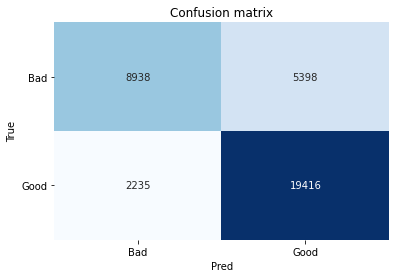

In [30]:
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


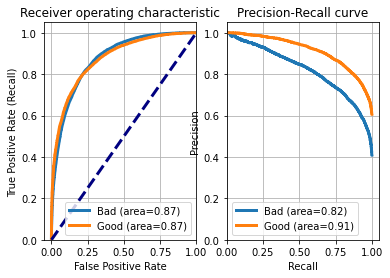

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2)
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

In [32]:
## select observation
i = 17
txt_instance = dtf_test["description_cleaner"].iloc[i]
## check true value and predicted value
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))
## show explanation
explainer = lime_text.LimeTextExplainer(class_names=
             np.unique(y_train))
explained = explainer.explain_instance(txt_instance, 
             model.predict_proba, num_features=5)
explained.show_in_notebook(text=txt_instance, predict_proba=False)

True: Bad --> Pred: Good | Prob: 0.56


C:\Users\audri\anaconda3\envs\PythonAdv\lib\site-packages\lime\lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


In [33]:
d = {'prediction' : predicted, 
     'actual' : y_test}

In [34]:
text_predictions_df = pd.DataFrame(data=d)
text_predictions_df

prediction actual
0            Bad    Bad
1           Good   Good
2           Good    Bad
3           Good   Good
4           Good   Good
...          ...    ...
35982       Good    Bad
35983       Good   Good
35984        Bad   Good
35985        Bad    Bad
35986        Bad   Good

[35987 rows x 2 columns]

In [35]:
text_predictions_df.to_csv('Data/text_predictions_binary.csv')

In [36]:
dtf_train, dtf_test = model_selection.train_test_split(dtf, test_size=0.3)
## get target
y_train = dtf_train["grade"].values
y_test = dtf_test["grade"].values

In [37]:
vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

In [38]:
corpus = dtf_train["description_cleaner"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [39]:
#sns.heatmap(X_train.todense()[:,np.random.randint(0,X_train.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

In [40]:
y = dtf_train["grade"]
X_names = vectorizer.get_feature_names()
p_value_limit = 0.95
dtf_features = pd.DataFrame()
for cat in np.unique(y):
    chi2, p = feature_selection.chi2(X_train, y==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "grade":cat}))
    dtf_features = dtf_features.sort_values(["grade","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()

In [41]:
for cat in np.unique(y):
   print("# {}:".format(cat))
   print("  . selected features:",
         len(dtf_features[dtf_features["grade"]==cat]))
   print("  . top features:", ",".join(
dtf_features[dtf_features["grade"]==cat]["feature"].values[:30]))
   print(" ")

# A:
  . selected features: 5735
  . top features: absolutely,acidic,aftertaste,age,age drink,age least,age many,age well,age year,aged,ageworthy,ageworthy wine,aging,aging drink,aging potential,ahead,alluring,alluring aroma,already,also,always,amazing,among,anise,another,another decade,appellation,apple,apéritif,aroma
 
# B:
  . selected features: 2761
  . top features: alongside,apple,balanced,basic,bitter,black,black cherry,dried black,dull,everyday,finegrained,finegrained tannin,firm,flat,full,generic,gorgeous,impressive,impressive wine,informal,juicy,juicy palate,lack,lead,lead nose,lean,little,much,offer,offer dried
 
# C:
  . selected features: 3763
  . top features: age,age well,aging,aroma,astringent,attractive,balance,balanced,barrel sample,beautiful,beautifully,best,bit,black,black cherry,blackberry,bottling,bright,cabernet,cassis,cellar,chocolate,cinnamon,citrus,clean,complex,complexity,concentrated,concentration,crisp
 
# D:
  . selected features: 5222
  . top features: ac

In [42]:
vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [43]:
classifier = naive_bayes.MultinomialNB()

In [44]:
## pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])
## train classifier
model["classifier"].fit(X_train, y_train)
## test
X_test = dtf_test["description_cleaner"].values
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

In [45]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
y_test_array

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [46]:
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test_array, predicted_prob, 
                            multi_class="one_vs_rest")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))

Accuracy: 0.51
Auc: 0.83
Detail:


C:\Users\audri\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       0.68      0.58      0.63      9548
           B       0.45      0.74      0.56     12039
           C       0.45      0.25      0.32      8064
           D       0.55      0.36      0.44      5473
           F       0.00      0.00      0.00       863

    accuracy                           0.51     35987
   macro avg       0.43      0.39      0.39     35987
weighted avg       0.52      0.51      0.49     35987



(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'A'),
  Text(0, 1.5, 'B'),
  Text(0, 2.5, 'C'),
  Text(0, 3.5, 'D'),
  Text(0, 4.5, 'F')])

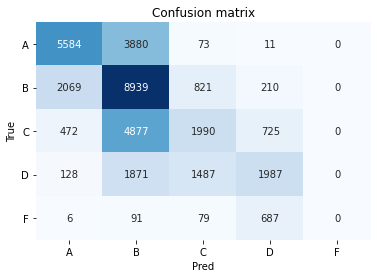

In [47]:
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


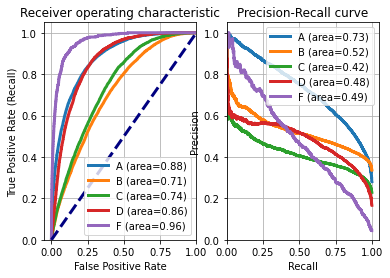

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=2)
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

In [49]:
## select observation
i = 17
txt_instance = dtf_test["description_cleaner"].iloc[i]
## check true value and predicted value
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))
## show explanation
explainer = lime_text.LimeTextExplainer(class_names=
             np.unique(y_train))
explained = explainer.explain_instance(txt_instance, 
             model.predict_proba, num_features=5)
explained.show_in_notebook(text=txt_instance, predict_proba=False)

True: B --> Pred: B | Prob: 0.55


C:\Users\audri\anaconda3\envs\PythonAdv\lib\site-packages\lime\lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


In [50]:
d = {'prediction' : predicted, 
     'actual' : y_test}

In [51]:
text_predictions_df = pd.DataFrame(data=d)
text_predictions_df

prediction actual
0              B      B
1              A      A
2              B      A
3              B      B
4              A      A
...          ...    ...
35982          A      B
35983          B      B
35984          B      A
35985          A      A
35986          A      A

[35987 rows x 2 columns]

In [52]:
text_predictions_df.to_csv('Data/text_predictions_grades.csv')

In [53]:
dtf_train, dtf_test = model_selection.train_test_split(dtf, test_size=0.3)
## get target
y_train = dtf_train["good_bad"].values
y_test = dtf_test["good_bad"].values

In [54]:
vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

In [55]:
corpus = dtf_train["adjectives"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [56]:
#sns.heatmap(X_train.todense()[:,np.random.randint(0,X_train.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

In [57]:
y = dtf_train["good_bad"]
X_names = vectorizer.get_feature_names()
p_value_limit = 0.95
dtf_features = pd.DataFrame()
for cat in np.unique(y):
    chi2, p = feature_selection.chi2(X_train, y==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "good_bad":cat}))
    dtf_features = dtf_features.sort_values(["good_bad","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()

In [58]:
for cat in np.unique(y):
   print("# {}:".format(cat))
   print("  . selected features:",
         len(dtf_features[dtf_features["good_bad"]==cat]))
   print("  . top features:", ",".join(
dtf_features[dtf_features["good_bad"]==cat]["feature"].values[:30]))
   print(" ")

# Bad:
  . selected features: 3985
  . top features: acidic,ageworthy,aromatic,attractive,bad,balanced,balsamic,basic,beautiful,best,big,bitter,black,black black,blue,bold,bottle,cellar,choppy,cinnamon,citric,classic,clean,complete,complex,concentrated,dark,decent,deep,delicious
 
# Good:
  . selected features: 3985
  . top features: acidic,ageworthy,aromatic,attractive,bad,balanced,balsamic,basic,beautiful,best,big,bitter,black,black black,blue,bold,bottle,cellar,choppy,cinnamon,citric,classic,clean,complete,complex,concentrated,dark,decent,deep,delicious
 


In [59]:
vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [60]:
classifier = naive_bayes.MultinomialNB()

In [63]:
## pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])
## train classifier
model["classifier"].fit(X_train, y_train)
## test
X_test = dtf_test["adjectives"].values
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

In [64]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
y_test_array

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]], dtype=uint8)

In [65]:
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test_array, predicted_prob, 
                            multi_class="one_vs_one")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))

Accuracy: 0.75
Auc: 0.83
Detail:
              precision    recall  f1-score   support

         Bad       0.76      0.56      0.64     14454
        Good       0.75      0.88      0.81     21533

    accuracy                           0.75     35987
   macro avg       0.75      0.72      0.73     35987
weighted avg       0.75      0.75      0.74     35987



(array([0.5, 1.5]), [Text(0, 0.5, 'Bad'), Text(0, 1.5, 'Good')])

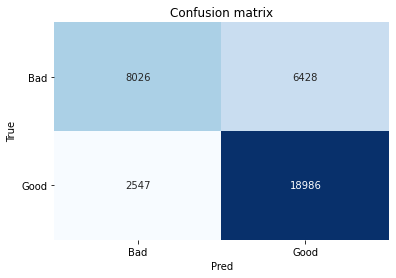

In [66]:
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


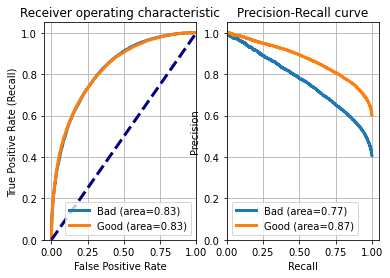

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2)
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

In [68]:
## select observation
i = 17
txt_instance = dtf_test["description_cleaner"].iloc[i]
## check true value and predicted value
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))
## show explanation
explainer = lime_text.LimeTextExplainer(class_names=
             np.unique(y_train))
explained = explainer.explain_instance(txt_instance, 
             model.predict_proba, num_features=5)
explained.show_in_notebook(text=txt_instance, predict_proba=False)

True: Good --> Pred: Good | Prob: 0.85


C:\Users\audri\anaconda3\envs\PythonAdv\lib\site-packages\lime\lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


In [69]:
d = {'prediction' : predicted, 
     'actual' : y_test}

In [70]:
adj_predictions_df = pd.DataFrame(data=d)
adj_predictions_df

prediction actual
0           Good   Good
1           Good   Good
2            Bad    Bad
3           Good   Good
4            Bad    Bad
...          ...    ...
35982        Bad    Bad
35983        Bad    Bad
35984        Bad   Good
35985        Bad    Bad
35986       Good    Bad

[35987 rows x 2 columns]

In [71]:
adj_predictions_df.to_csv('Data/adj_predictions_binary.csv')

In [72]:
dtf_train, dtf_test = model_selection.train_test_split(dtf, test_size=0.3)
## get target
y_train = dtf_train["grade"].values
y_test = dtf_test["grade"].values

In [73]:
vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

In [74]:
corpus = dtf_train["adjectives"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [75]:
#sns.heatmap(X_train.todense()[:,np.random.randint(0,X_train.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

In [76]:
y = dtf_train["grade"]
X_names = vectorizer.get_feature_names()
p_value_limit = 0.95
dtf_features = pd.DataFrame()
for cat in np.unique(y):
    chi2, p = feature_selection.chi2(X_train, y==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "grade":cat}))
    dtf_features = dtf_features.sort_values(["grade","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()

In [78]:
for cat in np.unique(y):
   print("# {}:".format(cat))
   print("  . selected features:",
         len(dtf_features[dtf_features["grade"]==cat]))
   print("  . top features:", ",".join(
dtf_features[dtf_features["grade"]==cat]["feature"].values[:30]))
   print(" ")

# A:
  . selected features: 3584
  . top features: ageworthy,aromatic,attractive,auslese,balsamic,basic,beautiful,best,big,bitter,black,black black,black dark,black impressive,black olive,black powerful,black rich,bottle,brilliant,cellar,classic,clean,compelling,complete,complex,complex black,concentrated,considerable,dark,deep
 
# B:
  . selected features: 1536
  . top features: basic,beautiful,black,everyday,flat,full,generic,gorgeous,impressive,informal,lean,little,much,short,simple,sugary,sweet,thin,vegetal,white,yellow,ripe,vibrant,rustic,heavy,rich,unripe,least,smooth,linear
 
# C:
  . selected features: 1734
  . top features: attractive,beautiful,best,black,bright,clean,complex,concentrated,dark,deep,delicious,easy,elegant,excellent,fine,fresh,generous,good,gorgeous,great,impressive,informal,intense,least,light,little,long,new,nice,pleasant
 
# D:
  . selected features: 2217
  . top features: acidic,attractive,bad,basic,beautiful,best,big,bitter,black,black black,bold,burnt,casu

In [79]:
vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [80]:
classifier = naive_bayes.MultinomialNB()

In [81]:
## pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])
## train classifier
model["classifier"].fit(X_train, y_train)
## test
X_test = dtf_test["adjectives"].values
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

In [82]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
y_test_array

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [83]:
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test_array, predicted_prob, 
                            multi_class="one_vs_rest")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))

Accuracy: 0.46
Auc: 0.78
Detail:
              precision    recall  f1-score   support

           A       0.62      0.47      0.54      9498
           B       0.41      0.75      0.53     11968
           C       0.41      0.18      0.25      8200
           D       0.51      0.29      0.37      5431
           F       0.80      0.00      0.01       890

    accuracy                           0.46     35987
   macro avg       0.55      0.34      0.34     35987
weighted avg       0.49      0.46      0.43     35987



(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'A'),
  Text(0, 1.5, 'B'),
  Text(0, 2.5, 'C'),
  Text(0, 3.5, 'D'),
  Text(0, 4.5, 'F')])

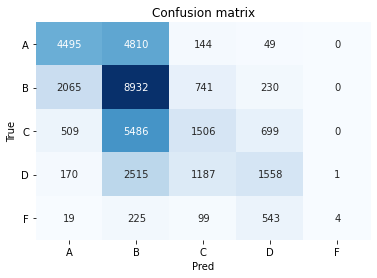

In [84]:
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

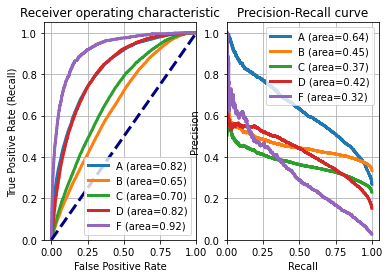

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=2)
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

In [86]:
## select observation
i = 17
txt_instance = dtf_test["adjectives"].iloc[i]
## check true value and predicted value
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))
## show explanation
explainer = lime_text.LimeTextExplainer(class_names=
             np.unique(y_train))
explained = explainer.explain_instance(txt_instance, 
             model.predict_proba, num_features=5)
explained.show_in_notebook(text=txt_instance, predict_proba=False)

True: A --> Pred: A | Prob: 0.6


C:\Users\audri\anaconda3\envs\PythonAdv\lib\site-packages\lime\lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


In [87]:
d = {'prediction' : predicted, 
     'actual' : y_test}

In [88]:
adj_predictions_df = pd.DataFrame(data=d)
adj_predictions_df

prediction actual
0              A      B
1              B      B
2              B      C
3              B      A
4              B      C
...          ...    ...
35982          B      A
35983          A      A
35984          B      B
35985          B      A
35986          B      D

[35987 rows x 2 columns]

In [89]:
adj_predictions_df.to_csv('Data/adj_predictions_grades.csv')